In [ ]:
ROOT = '/content/drive/MyDrive/ColabNotebooks/điệp viên'


In [ ]:
DATA_FOLDER = ROOT + '/data'
import pandas as pd
test_df = pd.read_parquet(DATA_FOLDER + '/test.parquet')
# train_df = pd.read_parquet(DATA_FOLDER + '/train.parquet')
train_df = pd.read_parquet('/content/drive/MyDrive/ColabNotebooks/30last_v2/train.parquet')

In [ ]:
DATA_FOLDER = ROOT + '/splitted_data'
import pandas as pd
test_df = pd.read_parquet(DATA_FOLDER + '/test.parquet')
train_df = pd.read_parquet(DATA_FOLDER + '/train.parquet')
# train_df = pd.read_parquet('/content/drive/MyDrive/ColabNotebooks/splitted_30last/train.parquet')

In [ ]:
# DATA_FOLDER = ROOT + '/splitted_data'
import pandas as pd
test_df = pd.read_parquet('/content/drive/MyDrive/ColabNotebooks/splitted_unidata_sub/test.parquet')
train_df = pd.read_parquet('/content/drive/MyDrive/ColabNotebooks/splitted_unidata_sub/train.parquet')
# train_df = pd.read_parquet('/content/drive/MyDrive/ColabNotebooks/splitted_30last/train.parquet')

# Group to edge

In [ ]:
try:
  del train_df['day']
except:
  print('no column day')
  pass

In [91]:
import numpy as np
TRAIN_TS_MIN = 1659304800
def transform_df(df):
  df['ts'] = df['ts'] - TRAIN_TS_MIN
  df['clicks'] = np.where(df['type'] == 0, 1, 0)
  df['carts'] = np.where(df['type'] == 1, 1, 0)
  df['orders'] = np.where(df['type'] == 2, 1, 0)
  assert df['clicks'].sum() + df['carts'].sum() + df['orders'].sum() == df.shape[0]
  del df['type']


def transform_df(df):
  df['clicks'] = np.where(df['type'] == 0, 1, 0)
  df['carts'] = np.where(df['type'] == 1, 1, 0)
  df['orders'] = np.where(df['type'] == 2, 1, 0)
  assert df['clicks'].sum() + df['carts'].sum() + df['orders'].sum() == df.shape[0]
  del df['type']


In [ ]:
transform_df(train_df)
train_df

In [ ]:
transform_df(test_df)
test_df

In [ ]:
from tqdm.notebook import tqdm
import numpy as np
step = train_df.shape[0] // 5
start = [i * step for i in range(5)]
end = [i + step for i in start]
end[-1] = train_df.shape[0] 
edges = []

for i in tqdm(range(len(start))):

  edges.append(train_df.iloc[start[i] : end[i]].groupby(['session', 'aid']).agg({ 
      'ts': ['last','first'],
      'clicks': 'sum',
      'carts': 'sum',
      'orders': 'sum',
  }))

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
del train_df

In [ ]:
for i in tqdm(range(5)):
  edges[i] = edges[i].reset_index()
edges = pd.concat(edges)
edges.shape

  0%|          | 0/5 [00:00<?, ?it/s]

(94282512, 7)

In [ ]:
edges_test = test_df.groupby(['session', 'aid']).agg({ 
      'ts': ['last','first'],
      'clicks': 'sum',
      'carts': 'sum',
      'orders': 'sum',
  }).reset_index()

In [ ]:
del test_df

In [ ]:
edges.shape

(94282512, 7)

In [ ]:
edges_test.shape

(5535990, 7)

In [ ]:
edges

session      aid       ts          clicks carts orders
                                last    first    sum   sum    sum
0                0    16246    62919    62919      1     0      0
1                0    30373  1798887  1798887      1     0      0
2                0    97836  1590509  1590509      1     0      0
3                0   102416  1714839  1714839      1     0      0
4                0   154930  1241409  1241409      1     0      0
...            ...      ...      ...      ...    ...   ...    ...
19503581  11098523   175715  1814397  1814397      1     0      0
19503582  11098524  1088524  1814398  1814398      1     0      0
19503583  11098525   182927  1814399  1814399      1     0      0
19503584  11098526   510055  1814399  1814399      1     0      0
19503585  11098527  1659014  1814399  1814399      1     0      0

[94282512 rows x 7 columns]

In [ ]:
edges_test

session      aid       ts          clicks carts orders
                               last    first    sum   sum    sum
0        11098528    11830  1814400  1814400      1     0      0
1        11098529  1105029  1814400  1814400      1     0      0
2        11098530   264500  1814488  1814400      2     0      0
3        11098530   409236  1815732  1814569      3     1      0
4        11098531   396199  1814946  1814468      2     0      1
...           ...      ...      ...      ...    ...   ...    ...
5535985  12899774    33035  2419168  2419168      1     0      0
5535986  12899775  1743151  2419170  2419170      1     0      0
5535987  12899776   548599  2419172  2419172      1     0      0
5535988  12899777   384045  2419176  2419176      1     0      0
5535989  12899778   561560  2419183  2419183      1     0      0

[5535990 rows x 7 columns]

In [ ]:
edges_test.to_parquet('/content/drive/MyDrive/ColabNotebooks/unidata_30last/edges_test.parquet', index = False)

In [ ]:
edges.to_parquet('/content/drive/MyDrive/ColabNotebooks/unidata_30last/edges.parquet', index = False)

In [ ]:
edges_test.to_parquet('/content/drive/MyDrive/ColabNotebooks/splitted_unidata_30last/edges_test.parquet', index = False)

In [ ]:
edges.to_parquet('/content/drive/MyDrive/ColabNotebooks/splitted_unidata_30last/edges.parquet', index = False)

# EDA

In [ ]:
train_df 

,session,aid,ts,type
0,0,1517085,1659304800,0
1,0,1563459,1659304904,0
2,0,1309446,1659367439,0
3,0,16246,1659367719,0
4,0,1781822,1659367871,0
...,...,...,...,...
163955175,11098523,175715,1661119197,0
163955176,11098524,1088524,1661119198,0
163955177,11098525,182927,1661119199,0
163955178,11098526,510055,1661119199,0


In [ ]:
train_df['ts'] = train_df['ts'] - 1659304800

In [ ]:
train_df = train_df.sort_values(['session', 'ts'])

In [ ]:
train_df

,session,aid,ts,type
0,11098528,11830,1814400,0
1,11098529,1105029,1814400,0
2,11098530,264500,1814400,0
3,11098530,264500,1814488,0
4,11098530,409236,1814569,0
...,...,...,...,...
7683572,12899774,33035,2419168,0
7683573,12899775,1743151,2419170,0
7683574,12899776,548599,2419172,0
7683575,12899777,384045,2419176,0


In [ ]:
train_df['diff'] = train_df['ts'].diff()

In [ ]:
session = train_df['session'].values

In [ ]:
import numpy as np


In [ ]:
ends_idx = session[1: ] - session[:-1]

In [ ]:
start_session = np.argwhere(ends_idx > 0) + 1

In [ ]:
start_session

array([[      1],
       [      2],
       [      8],
       ...,
       [7683574],
       [7683575],
       [7683576]])

In [ ]:
start_session  = np.vstack(([0], start_session))

In [ ]:
start_session

array([[      0],
       [      1],
       [      2],
       ...,
       [7683574],
       [7683575],
       [7683576]])

In [ ]:
train_df

,session,aid,ts,type,diff
0,11098528,11830,1814400,0,NaN
1,11098529,1105029,1814400,0,0.0
2,11098530,264500,1814400,0,0.0
3,11098530,264500,1814488,0,88.0
4,11098530,409236,1814569,0,81.0
...,...,...,...,...,...
7683572,12899774,33035,2419168,0,2.0
7683573,12899775,1743151,2419170,0,2.0
7683574,12899776,548599,2419172,0,2.0
7683575,12899777,384045,2419176,0,4.0


In [ ]:
train_df.iloc[start_session, -1] = 0

In [ ]:
train_df

,session,aid,ts,type,diff
0,11098528,11830,1814400,0,0.0
1,11098529,1105029,1814400,0,0.0
2,11098530,264500,1814400,0,0.0
3,11098530,264500,1814488,0,88.0
4,11098530,409236,1814569,0,81.0
...,...,...,...,...,...
7683572,12899774,33035,2419168,0,0.0
7683573,12899775,1743151,2419170,0,0.0
7683574,12899776,548599,2419172,0,0.0
7683575,12899777,384045,2419176,0,0.0


In [ ]:
diff = train_df[train_df['diff'] > 60 * 5]['diff'].values

In [ ]:
DAYS = 3600 * 24

In [ ]:
s = np.sum(diff) 

(array([ 9734999., 11447412., 12538613., 13347443., 13981416., 14501836.,
        14943723., 15341581., 15717932., 16085147., 16441476., 16783903.,
        17109167., 17419112., 17714931., 18000636., 18283081., 18566742.,
        18856629., 19156617., 19471786., 19809142., 20182934.]),
 array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
        0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
        0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
        0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
        0.83333333, 0.875     , 0.91666667, 0.95833333]),
 <a list of 23 Patch objects>)

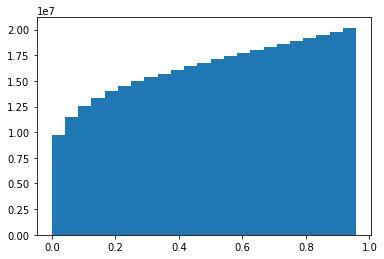

In [ ]:
import matplotlib.pyplot as plt 
plt.hist(diff / DAYS, bins = np.arange(24) / 24, cumulative = True)

([<matplotlib.axis.XTick at 0x7fdd2761c550>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21'),
  Text(0, 0, '22'),
  Text(0, 0, '23')])

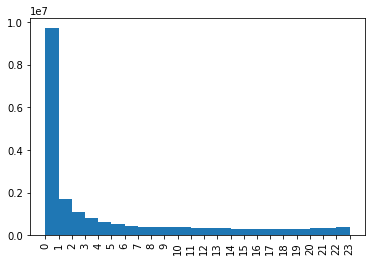

In [ ]:
plt.hist(diff / DAYS, bins = np.arange(24) / 24)
plt.xticks(np.arange(24) / 24, labels = np.arange(24), rotation = 90)

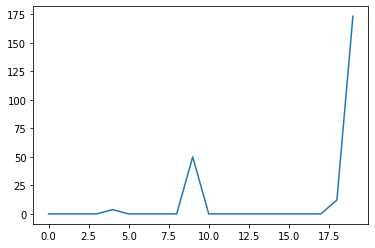

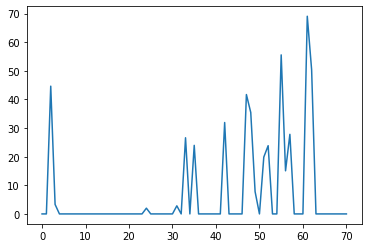

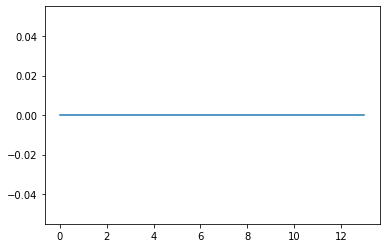

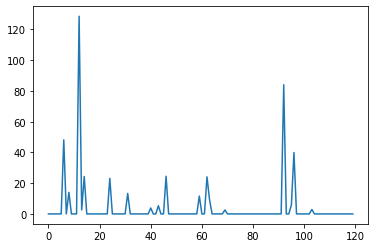

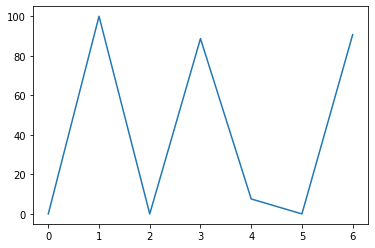

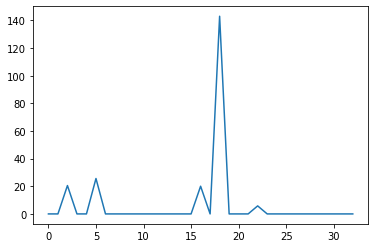

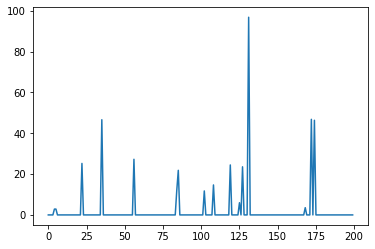

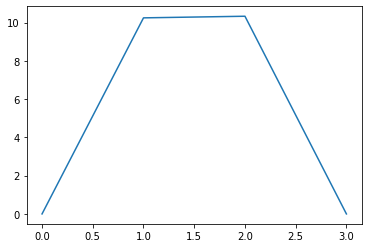

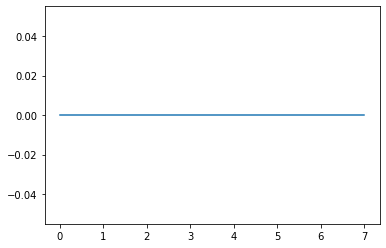

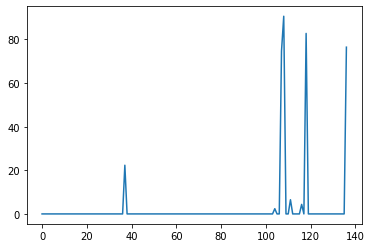

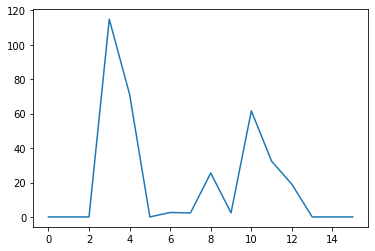

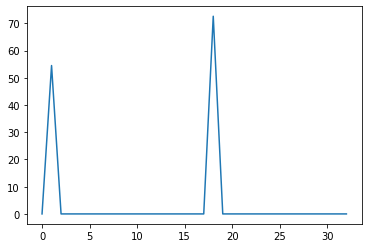

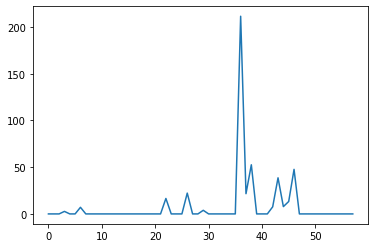

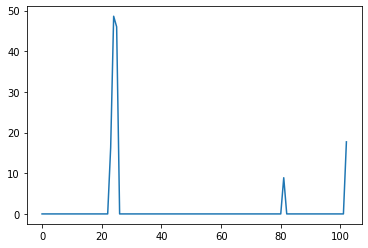

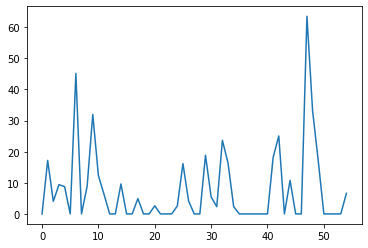

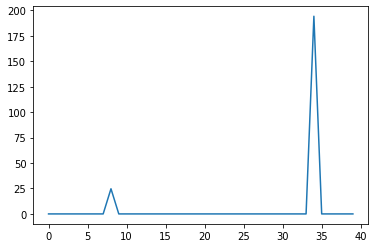

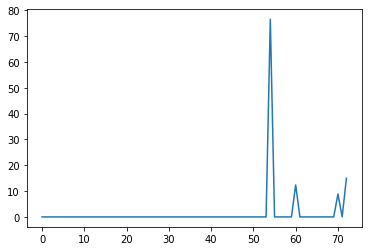

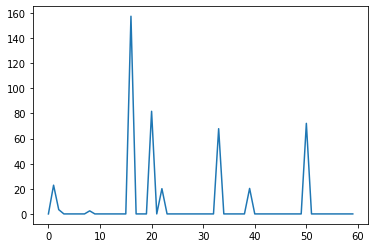

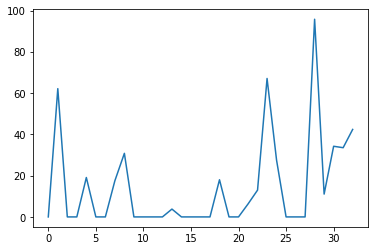

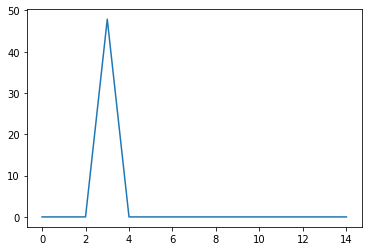

In [ ]:
session  = np.random.choice(train_df['session'].values, 20)
for s in session:
  df = train_df[train_df['session'] == s]
  plt.plot(np.arange(len(df)),np.where( df['diff'] / 3600 > 2 ,df['diff'] / 3600, 0))
  plt.show()

In [ ]:
train_df

,session,aid,ts,type,diff
0,0,1517085,0,0,0.0
1,0,1563459,104,0,104.0
2,0,1309446,62639,0,62535.0
3,0,16246,62919,0,280.0
4,0,1781822,63071,0,152.0
...,...,...,...,...,...
163955175,11098523,175715,1814397,0,0.0
163955176,11098524,1088524,1814398,0,0.0
163955177,11098525,182927,1814399,0,0.0
163955178,11098526,510055,1814399,0,0.0


#Add subsession

In [ ]:
train_df = test_df

In [ ]:
train_df

,session,aid,ts,type
0,11098528,11830,1661119200,0
1,11098529,1105029,1661119200,0
2,11098530,264500,1661119200,0
3,11098530,264500,1661119288,0
4,11098530,409236,1661119369,0
...,...,...,...,...
7683572,12899774,33035,1661723968,0
7683573,12899775,1743151,1661723970,0
7683574,12899776,548599,1661723972,0
7683575,12899777,384045,1661723976,0


In [ ]:
from tqdm.notebook import tqdm
cur_session = -1
cur_subsession = -1
subsessions = []
two_hours = 2 * 3600
for row in tqdm(train_df.itertuples(), total = train_df.shape[0]):
  if row.session != cur_session:
    cur_session = row.session
    cur_subsession = 0
  if row.diff > two_hours:
    cur_subsession += 1
  
  subsessions.append(cur_subsession)



  0%|          | 0/7683577 [00:00<?, ?it/s]

In [ ]:
train_df['subsession'] = subsessions

In [ ]:
train_df

In [ ]:
train_df.to_parquet('/content/drive/MyDrive/ColabNotebooks/splitted_unidata_sub/train.parquet', index = False)

In [ ]:
train_df.to_parquet('/content/drive/MyDrive/ColabNotebooks/splitted_unidata_sub/test.parquet', index = False)

# Last 30 days

In [ ]:
train_df

,session,aid,ts,type,day
0,0,1517085,1659304800,0,19205
1,0,1563459,1659304904,0,19205
2,0,1309446,1659367439,0,19206
3,0,16246,1659367719,0,19206
4,0,1781822,1659367871,0,19206
...,...,...,...,...,...
146977918,11098523,175715,1661119197,0,19226
146977919,11098524,1088524,1661119198,0,19226
146977920,11098525,182927,1661119199,0,19226
146977921,11098526,510055,1661119199,0,19226


In [ ]:
DAY = 24 * 3600 

In [ ]:
train_df['day'] = train_df['ts'] // DAY  + 1

In [ ]:
from tqdm.notebook import tqdm
keep_idx = []
cnt = 0
session = -1
day = -1
for row in tqdm(train_df.itertuples(), total = train_df.shape[0]):
  if day != row.day or session != row.session:
    day, session = row.day, row.session
    cnt = 0
  if cnt > 29:
    keep_idx.append(False)
    continue
  keep_idx.append(True)
  cnt += 1


  0%|          | 0/163955180 [00:00<?, ?it/s]

In [ ]:
last_30_train_df = train_df[keep_idx]

In [ ]:
last_30_train_df.to_parquet('/content/drive/MyDrive/ColabNotebooks/30last_v2/train.parquet', index = False)

In [ ]:
last_30_train_df.to_parquet('/content/drive/MyDrive/ColabNotebooks/splitted_30last/train.parquet', index = False)